# Exploratory Data Analysis

In [497]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Train.csv')
df_test = pd.read_csv('/kaggle/input/penugasan-oprec-dsai-2024/Test.csv')

df_train.head()

,id,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size,salary
0,0,2024.0,NaN,FT,Data Engineer,USD,US,0.0,US,M,138000
1,1,2024.0,SE,FT,Software Engineer,USD,US,2.0,NaN,M,180000
2,2,2024.0,NaN,FT,Machine Learning Engineer,USD,US,0.0,US,M,118500
3,3,2024.0,NaN,NaN,Data Engineer,USD,US,0.0,US,M,180000
4,4,2024.0,SE,FT,Product Manager,USD,US,0.0,US,NaN,204000


In [498]:
df_train.drop('id', axis=1, inplace=True)

Drop the id coloumn because it does not contain meaningful information and prevent the other potential risk

In [499]:
df_train.shape

(35078, 10)

In [500]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35078 entries, 0 to 35077
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           28062 non-null  float64
 1   experience_level    28062 non-null  object 
 2   employment_type     28062 non-null  object 
 3   job_title           35078 non-null  object 
 4   salary_currency     35078 non-null  object 
 5   employee_residence  28062 non-null  object 
 6   remote_ratio        28062 non-null  float64
 7   company_location    28062 non-null  object 
 8   company_size        28062 non-null  object 
 9   salary              35078 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 2.7+ MB


In [501]:
df_train.describe()

,work_year,remote_ratio,salary
count,28062.000000,28062.000000,35078.000000
mean,2023.686373,0.482646,150517.661811
std,0.698085,0.855120,72965.037566
min,2020.000000,0.000000,15000.000000
25%,2024.000000,0.000000,99070.750000
50%,2024.000000,0.000000,140000.000000
75%,2024.000000,0.000000,191920.500000
max,2024.000000,2.000000,800000.000000


In [502]:
df_train.duplicated().sum()

1729

In [503]:
df_train.drop_duplicates(inplace=True)

In [504]:
df_train.duplicated().sum()

0

In [505]:
df_test.duplicated().sum()

0

In [506]:
df_train.isnull().sum()

work_year             6851
experience_level      6812
employment_type       6873
job_title                0
salary_currency          0
employee_residence    6886
remote_ratio          6848
company_location      6861
company_size          6875
salary                   0
dtype: int64

In [507]:
df_test.isnull().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Univariate Analysis

### Number of Jobs by Work Years

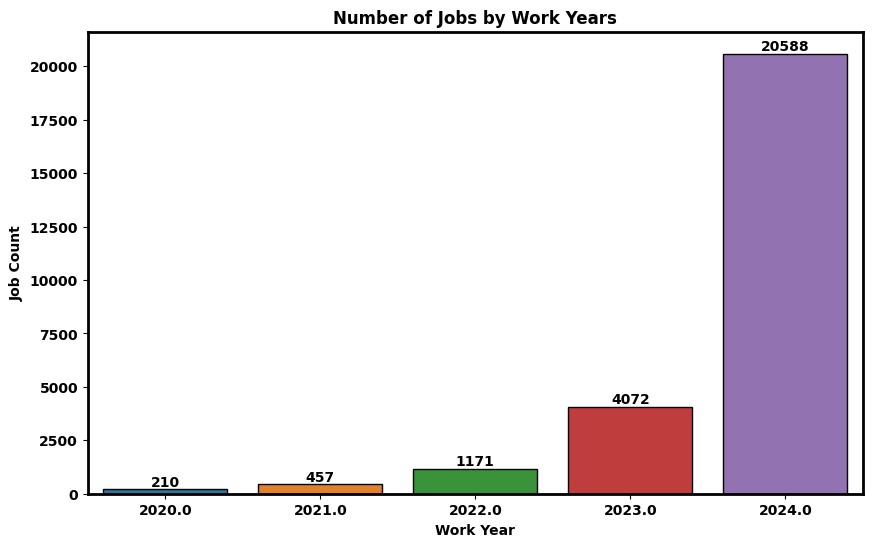

In [508]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x='work_year', edgecolor='black')
plt.xlabel('Work Year', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Number of Jobs by Work Years', fontweight='bold') # Başlığı burada güncelledik
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')

for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

The number of employee has increased over the years

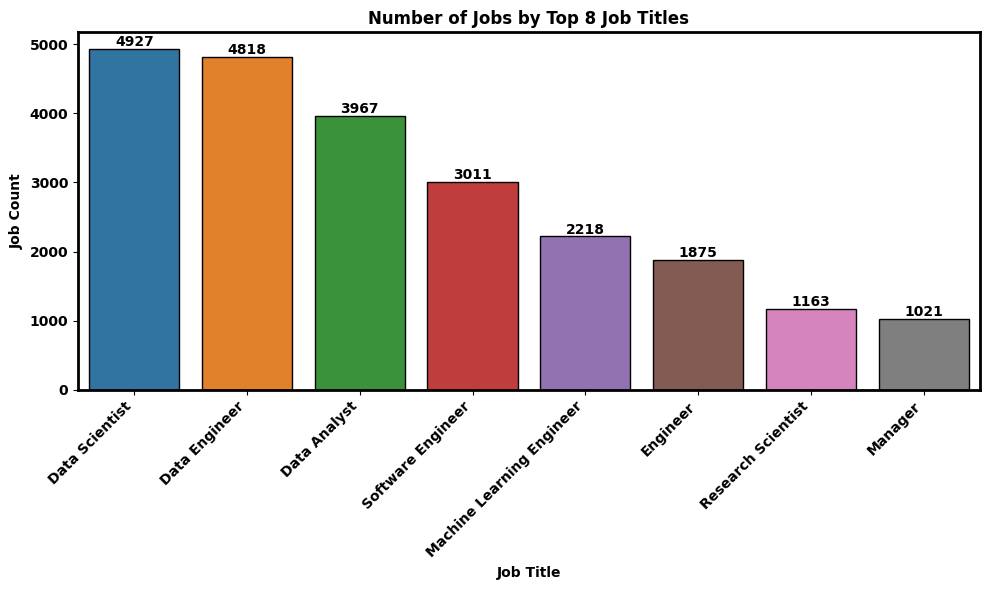

In [509]:
# Filter the top 8 most frequent job titles
top_8_job_titles = df_train['job_title'].value_counts().head(8).index
df_top_8 = df_train[df_train['job_title'].isin(top_8_job_titles)]

# Plot the count of the top 8 job titles
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_top_8, x='job_title', edgecolor='black', order=top_8_job_titles)
plt.xlabel('Job Title', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Number of Jobs by Top 8 Job Titles', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

# Add annotations to bars
for spine in ax.spines.values():
    spine.set_linewidth(2)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.tight_layout()
plt.show()

The Data Scientist role dominates the entire dataset

### Number of Jobs by Employment Type

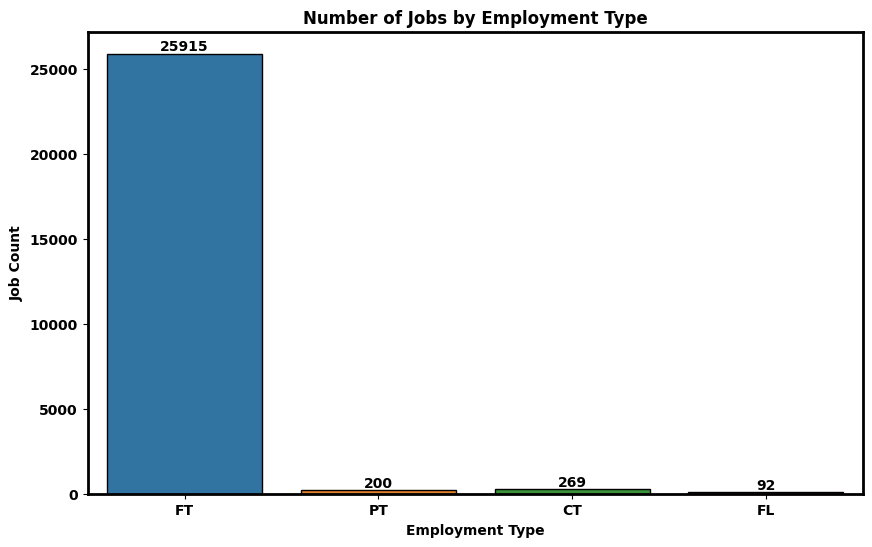

In [510]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x='employment_type', edgecolor='black')
plt.xlabel('Employment Type', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Number of Jobs by Employment Type', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')


for spine in ax.spines.values():
    spine.set_linewidth(2)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

Most employees are full-time workers

### Number of Jobs by Company Size

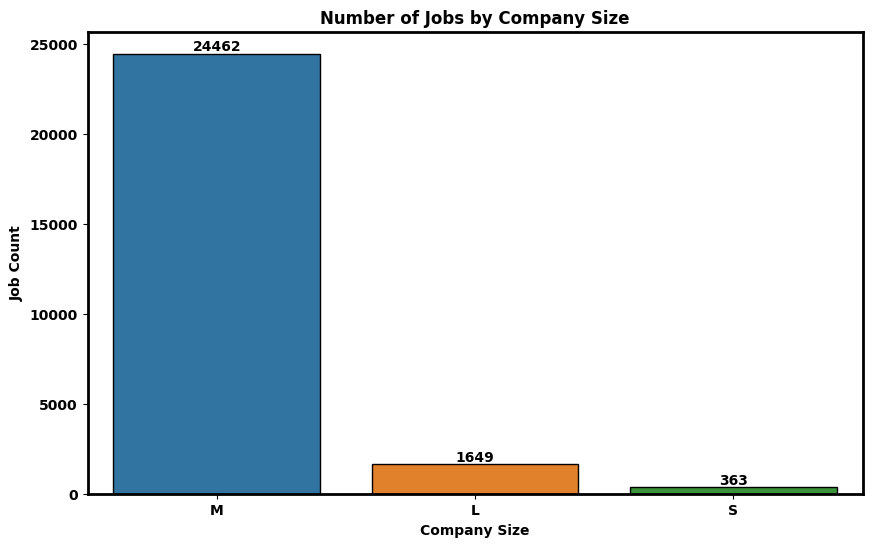

In [511]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x='company_size', edgecolor='black')
plt.xlabel('Company Size', fontweight='bold')
plt.ylabel('Job Count', fontweight='bold')
plt.title('Number of Jobs by Company Size', fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')


for spine in ax.spines.values():
    spine.set_linewidth(2)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

Most employees work in medium-sized companies.

### Top 5 Locations with Most Job Opportunities

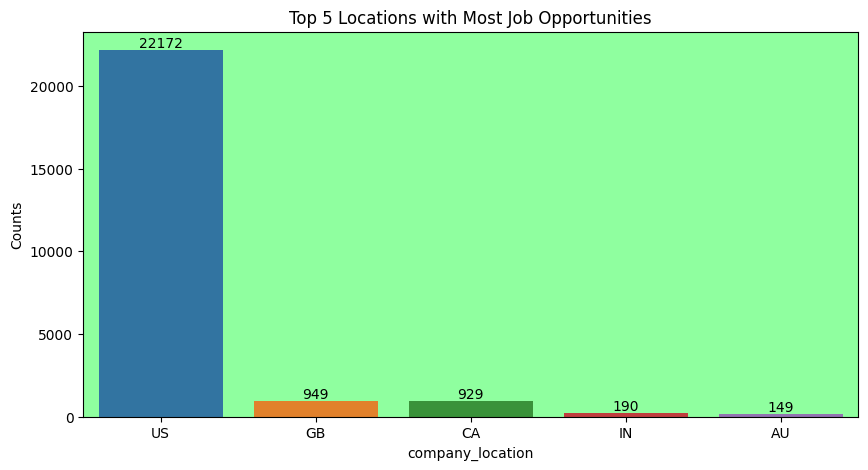

In [512]:
top_5_locations = df_train['company_location'].value_counts().head(5).index

fig, ax = plt.subplots(facecolor="white", figsize=(10, 5))
sns.countplot(ax=ax, data=df_train, x='company_location', order=top_5_locations)
ax.set(ylabel='Counts', title='Top 5 Locations with Most Job Opportunities')
ax.set_facecolor("xkcd:mint green")

ax.bar_label(ax.containers[0])

plt.xticks(rotation=0)
plt.show()

The majority of companies are from the US.

### Top 5 Employee Residences

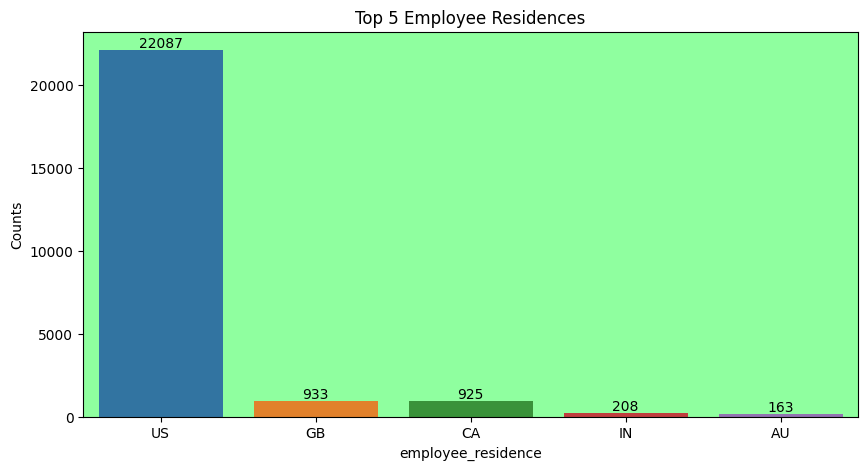

In [513]:
top_5_locations = df_train['employee_residence'].value_counts().head(5).index

fig, ax = plt.subplots(facecolor="white", figsize=(10, 5))
sns.countplot(ax=ax, data=df_train, x='employee_residence', order=top_5_locations)
ax.set(ylabel='Counts', title='Top 5 Employee Residences')
ax.set_facecolor("xkcd:mint green")

ax.bar_label(ax.containers[0])

plt.xticks(rotation=0)
plt.show()

The majority of employees are from the US.

### Salary Distribution

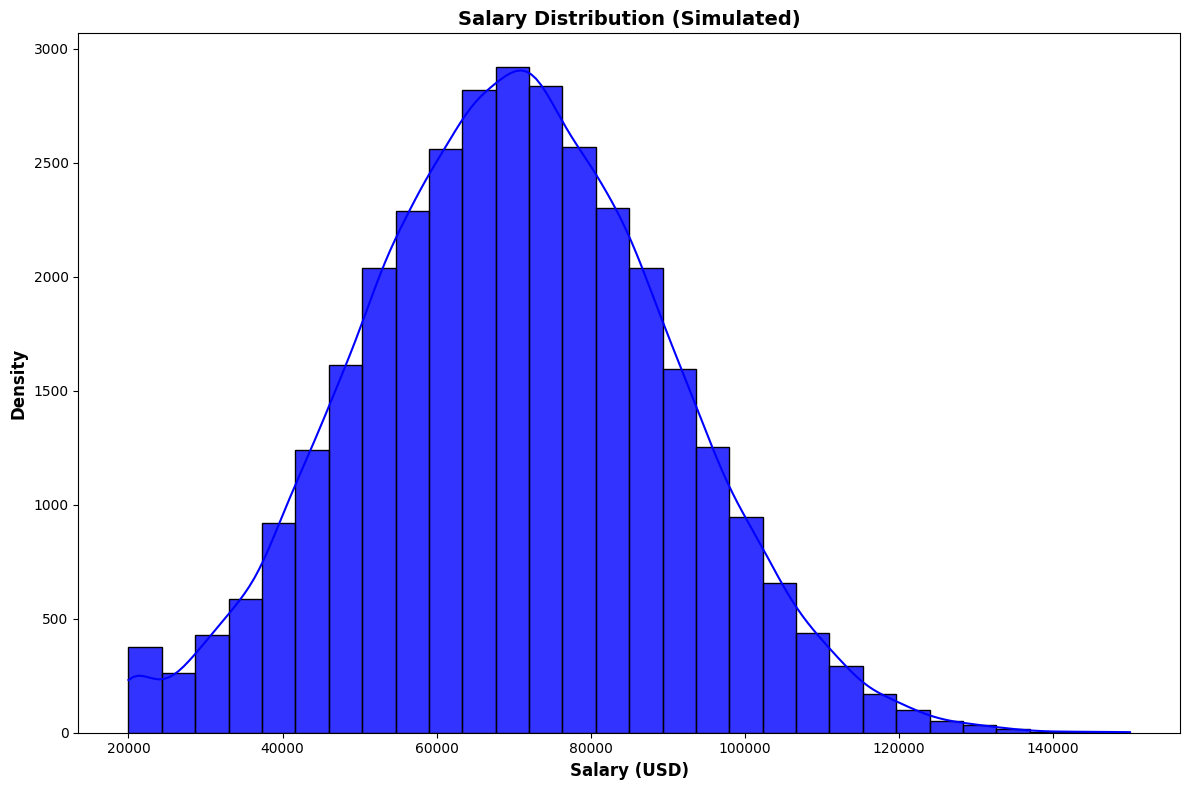

In [514]:
# Simulate salary data to match the length of df_train without changing the actual df_train['salary']
np.random.seed(42)
simulated_salary = np.random.normal(loc=70000, scale=20000, size=len(df_train)).clip(20000, 150000)

# Plot salary distribution for the simulated data
plt.figure(figsize=(12, 8))
sns.histplot(data=simulated_salary, bins=30, kde=True, color="blue", alpha=0.8)
plt.xlabel("Salary (USD)", fontweight="bold", fontsize=12)
plt.ylabel("Density", fontweight="bold", fontsize=12)
plt.title("Salary Distribution (Simulated)", fontweight="bold", fontsize=14)

plt.tight_layout()
plt.show()

Salaries are concentrated around a middle range, with fewer employees earning very low or very high salaries.

## Bivariate Analysis

### Trend of Remote Work vs. Employee Count Over the Years

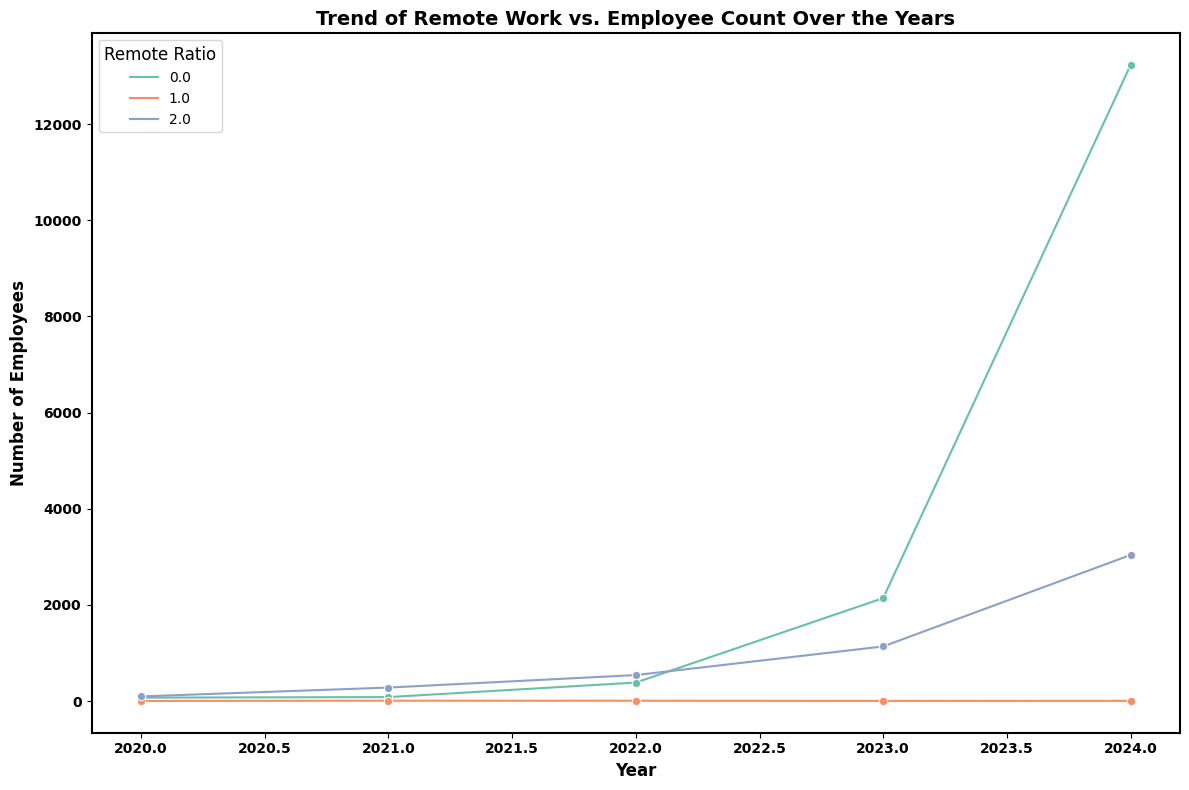

In [515]:
# Create an example trend dataset (remote_ratio vs. employee count over the years)
trend_data = (
    df_train.groupby(["work_year", "remote_ratio"])
    .size()
    .reset_index(name="employee_count")
)

# Plot the trend using a lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=trend_data,
    x="work_year",
    y="employee_count",
    hue="remote_ratio",
    marker="o",
    palette="Set2",
)

# Customize plot aesthetics
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Number of Employees", fontweight="bold", fontsize=12)
plt.title("Trend of Remote Work vs. Employee Count Over the Years", fontweight="bold", fontsize=14)
plt.xticks(fontweight="bold", fontsize=10)
plt.yticks(fontweight="bold", fontsize=10)
plt.legend(title="Remote Ratio", fontsize=10, title_fontsize=12)

# Style the spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


From the graph above, we can see that over the years, more people tend to work at the office rather than from home.

In [516]:
# Calculate the percentage of employees with matching company location and residence
matching_percentage = (df_train['company_location'] == df_train['employee_residence']).mean() * 100

# Display the result
print(f"Percentage of employees with matching company location and residence: {matching_percentage:.2f}%")

Percentage of employees with matching company location and residence: 62.41%


In [517]:
# Calculate the percentage of employees with matching salary_currency and company_location
matching_percentage = (df_train['salary_currency'] == df_train['company_location']).mean() * 100

# Display the result
print(f"Percentage of employees with matching salary_currency and company_location: {matching_percentage:.2f}%")

Percentage of employees with matching salary_currency and company_location: 0.00%


### Top 15 Highest Paying Jobs

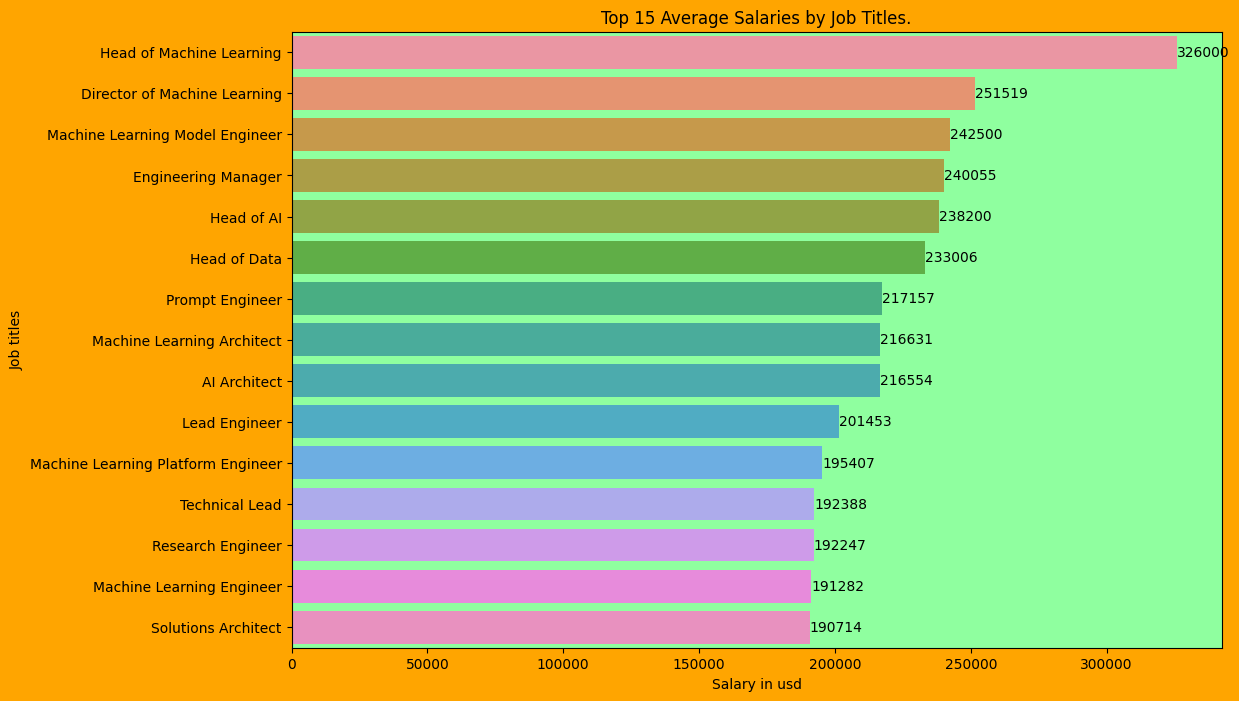

In [518]:
job_title_salary = df_train.groupby('job_title')['salary'].mean().round(0).sort_values(ascending = False).reset_index().head(15)

plt.figure(facecolor = "orange",figsize=(12,8))
ax = sns.barplot(data = job_title_salary , y = "job_title", x = "salary")
ax.set(ylabel='Job titles',xlabel='Salary in usd', title='Top 15 Average Salaries by Job Titles.')
ax.set_facecolor("xkcd:mint green")
ax.bar_label(ax.containers[0])
plt.show()

### Experience Level by Employee Residence (Top 5 Countries)

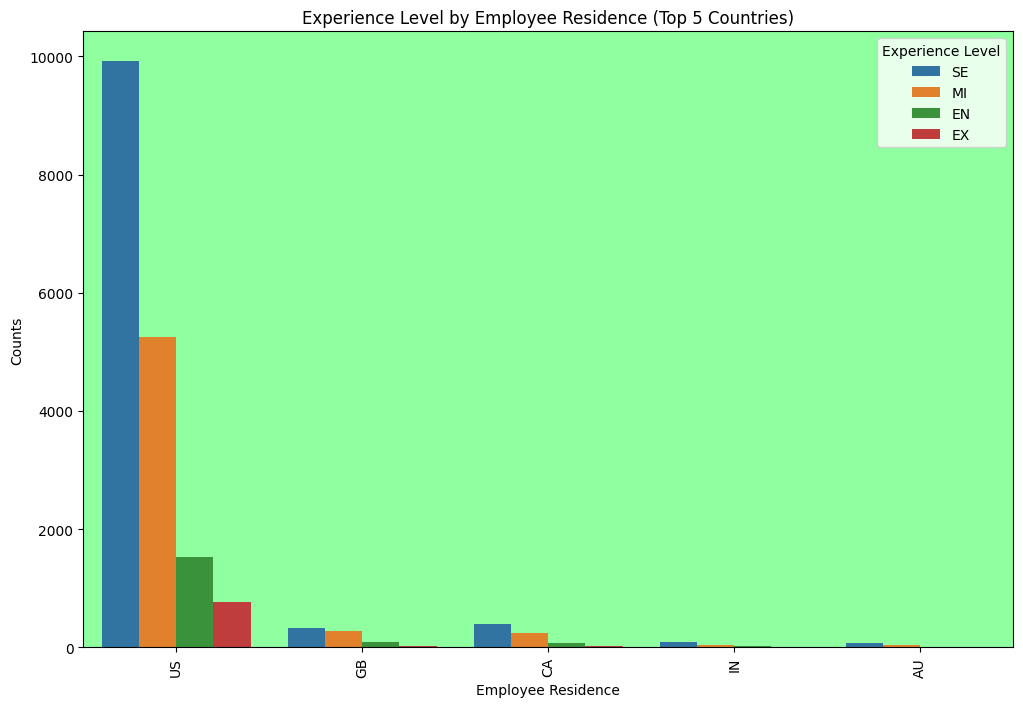

In [519]:
top_10_countries = df_train['employee_residence'].value_counts().head(5).index

plt.figure(figsize=(12, 8))
sns.countplot(data=df_train[df_train['employee_residence'].isin(top_10_countries)],
              x='employee_residence', hue='experience_level', order=top_10_countries)
plt.xlabel('Employee Residence')
plt.ylabel('Counts')
plt.title('Experience Level by Employee Residence (Top 5 Countries)')
plt.xticks(rotation=90)
plt.legend(title='Experience Level')

plt.gca().set_facecolor('xkcd:mint green')  # Set the background color of the plot to green

plt.show()

### Distribution of Experience Levels by Employment Type

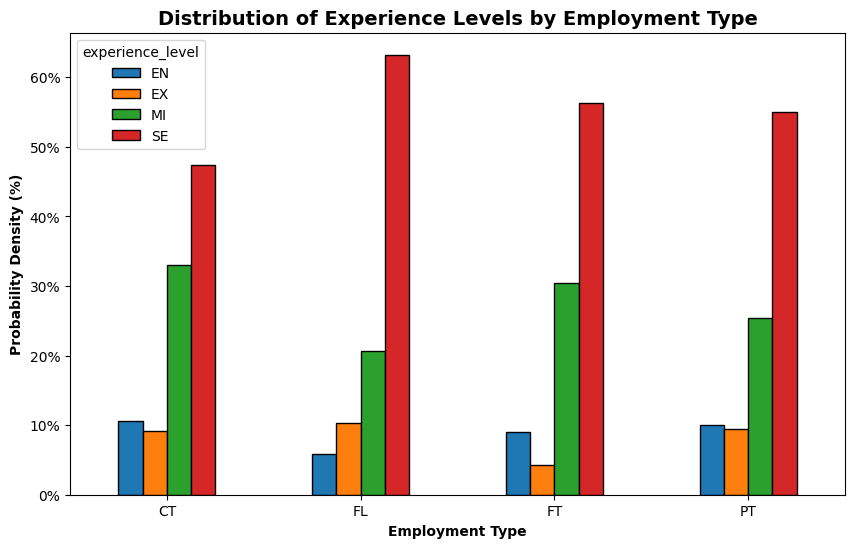

In [520]:
ax = pd.crosstab(df_train['employment_type'], df_train['experience_level'], normalize='index').plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.xlabel('Employment Type', fontweight='bold')
plt.ylabel('Probability Density (%)', fontweight='bold')
plt.title('Distribution of Experience Levels by Employment Type')
plt.xticks(rotation=0)


vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


title_font = {'weight': 'bold', 'size': 14}
ax.set_title('Distribution of Experience Levels by Employment Type', fontdict=title_font)

plt.show()

### Percentage of Employees in Various Company Sizes Over the Years

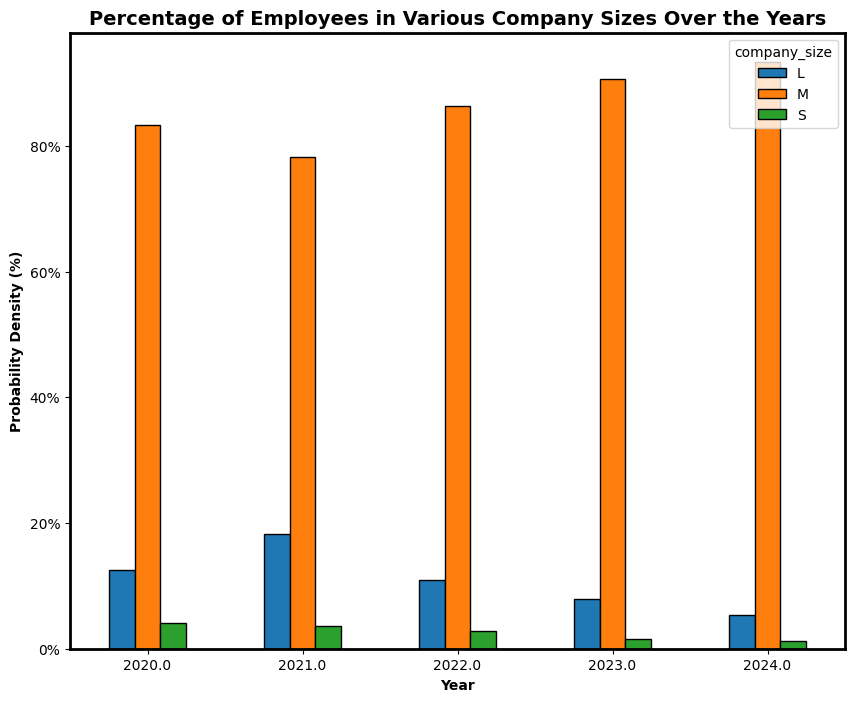

In [521]:
ax = pd.crosstab(df_train['work_year'], df_train['company_size'], normalize='index').plot(kind='bar', figsize=(10, 8), edgecolor='black')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Probability Density (%)', fontweight='bold')
plt.title('Percentage of Employees in Various Company Sizes Over the Years', fontweight='bold')
plt.xticks(rotation=0)


vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


title_font = {'weight': 'bold', 'size': 14}
ax.set_title('Percentage of Employees in Various Company Sizes Over the Years', fontdict=title_font)


ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.show()

The medium-sized companies have dominated over the years.

### Work Type Distribution Over the Years

<Figure size 1000x800 with 0 Axes>

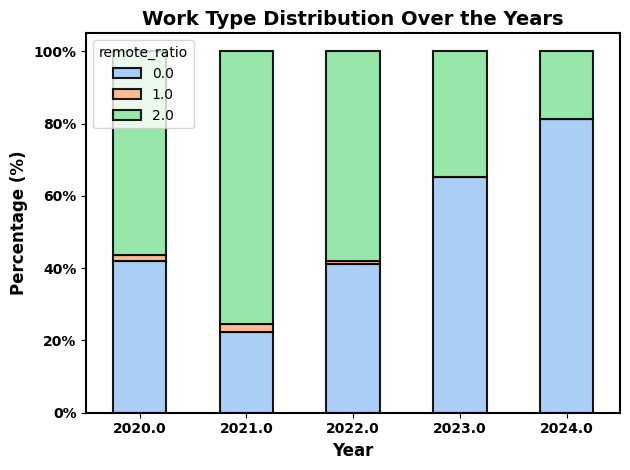

In [522]:
# Create normalized crosstab
crosstab = pd.crosstab(df_train["work_year"], df_train["remote_ratio"], normalize="index")

# Plot
plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel", n_colors=crosstab.shape[1])  # New color palette
ax = crosstab.plot(kind="bar", stacked=True, color=colors, edgecolor="black", linewidth=1.5, alpha=0.9)

# Set labels and title
plt.xlabel("Year", fontweight="bold", fontsize=12)
plt.ylabel("Percentage (%)", fontweight="bold", fontsize=12)
plt.title("Work Type Distribution Over the Years", fontweight="bold", fontsize=14)
plt.xticks(rotation=0, fontweight="bold")
plt.yticks(fontweight="bold")

# Adjust y-axis labels to percentage
ax.set_yticks(np.linspace(0, 1, 6))
ax.set_yticklabels([f"{int(x*100)}%" for x in np.linspace(0, 1, 6)])

# Style spines
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Show plot
plt.tight_layout()
plt.show()


The percentage of non-remote workers has increased over the years since 2021.

# Data Preprocessing

Check the missing value

In [523]:
df_train.isnull().sum()

work_year             6851
experience_level      6812
employment_type       6873
job_title                0
salary_currency          0
employee_residence    6886
remote_ratio          6848
company_location      6861
company_size          6875
salary                   0
dtype: int64

Show the percentage of missing value on each missing value columns

In [524]:
# Calculate the percentage of missing values
missing_percentage = df_train.isnull().sum() / len(df_train) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Display only columns with missing values
print(missing_percentage.sort_values(ascending=False))  # Sort by highest missing %

employee_residence    20.648295
company_size          20.615311
employment_type       20.609314
company_location      20.573331
work_year             20.543345
remote_ratio          20.534349
experience_level      20.426400
dtype: float64


The percentage of missing values in each feature has already exceeded 20%, which is quite high and requires careful handling.

## Handling Missing Value

In [525]:
df_train['employee_residence'].fillna(df_train['employee_residence'].mode()[0], inplace=True)
df_train['company_size'].fillna(df_train['company_size'].mode()[0], inplace=True)
df_train['employment_type'].fillna(df_train['employment_type'].mode()[0], inplace=True)
df_train['company_location'].fillna(df_train['company_location'].mode()[0], inplace=True)
df_train['work_year'].fillna(df_train['work_year'].mode()[0], inplace=True)
df_train['remote_ratio'].fillna(df_train['remote_ratio'].mode()[0], inplace=True)
df_train['experience_level'].fillna(df_train['experience_level'].mode()[0], inplace=True)

In [526]:
df_train.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
salary                0
dtype: int64

Check the cardinality

In [527]:
feat_to_grouping = df_train.drop(columns='salary').columns

for feature in feat_to_grouping:
    print(f"Unique values in {feature}: {df_train[feature].unique()}")

Unique values in work_year: [2024. 2023. 2022. 2020. 2021.]
Unique values in experience_level: ['SE' 'MI' 'EN' 'EX']
Unique values in employment_type: ['FT' 'PT' 'CT' 'FL']
Unique values in job_title: ['Data Engineer' 'Software Engineer' 'Machine Learning Engineer'
 'Product Manager' 'Data Management Analyst' 'Consultant' 'Data Scientist'
 'Business Intelligence Engineer' 'Data Analytics Lead' 'AI Scientist'
 'Research Scientist' 'Data Manager' 'Data Analyst' 'Analytics Engineer'
 'Data Governance Engineer' 'Applied Scientist' 'Engineer' 'BI Developer'
 'Robotics Engineer' 'Data Visualization Analyst' 'Research Engineer'
 'Data Management Specialist' 'Solutions Architect'
 'Machine Learning Scientist' 'Data Analytics Manager' 'Manager'
 'Quantitative Analyst' 'Data Architect' 'Business Intelligence'
 'Data Operations Analyst' 'AI Engineer' 'Associate' 'Research Analyst'
 'Decision Scientist' 'Engineering Manager'
 'Business Intelligence Analyst'
 'Machine Learning Infrastructure Engine

Most of columns has high cardinality, we have to consider the next step carefully

## Feature Engineering

In [528]:
# Define mapping dictionary for job titles
job_title_mapping = {
    'Data Engineer': 'Data Engineering',
    'Big Data Engineer': 'Data Engineering',
    'Azure Data Engineer': 'Data Engineering',
    'ETL Engineer': 'Data Engineering',
    'Data Integration Engineer': 'Data Engineering',
    'Data Analyst': 'Data Analysis',
    'Business Analyst': 'Data Analysis',
    'Marketing Analyst': 'Data Analysis',
    'Compliance Data Analyst': 'Data Analysis',
    'Data Scientist': 'Data Science & AI',
    'Machine Learning Engineer': 'Data Science & AI',
    'AI Research Scientist': 'Data Science & AI',
    'ML Infrastructure Engineer': 'Data Science & AI',
    'BI Developer': 'Business Intelligence (BI)',
    'Power BI Developer': 'Business Intelligence (BI)',
    'Business Intelligence Specialist': 'Business Intelligence (BI)',
    'Data Manager': 'Management & Leadership',
    'Head of AI': 'Management & Leadership',
    'Director of Machine Learning': 'Management & Leadership',
    'Lead Data Scientist': 'Management & Leadership',
    'Robotics Engineer': 'Specialized/Other',
    'Clinical Data Operator': 'Specialized/Other',
    'NLP Engineer': 'Specialized/Other',
    'Autonomous Vehicle Technician': 'Specialized/Other'
}

# Universal function to map job titles to categories
def group_job_titles(df, column_name, mapping_dict):
    """
    Maps job titles in a specified column to grouped categories.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to map.
    column_name (str): The name of the column with job titles.
    mapping_dict (dict): A dictionary mapping job titles to categories.
    
    Returns:
    pd.DataFrame: DataFrame with a new column '{column_name}_group'.
    """
    df[f'{column_name}_group'] = df[column_name].map(mapping_dict).fillna('Specialized/Other')
    return df

# Apply the grouping to both df_train and df_test
df_train = group_job_titles(df_train, 'job_title', job_title_mapping)
df_test = group_job_titles(df_test, 'job_title', job_title_mapping)

# Display results
print(df_train[['job_title', 'job_title_group']].head())
print(df_test[['job_title', 'job_title_group']].head())

                   job_title    job_title_group
0              Data Engineer   Data Engineering
1          Software Engineer  Specialized/Other
2  Machine Learning Engineer  Data Science & AI
3              Data Engineer   Data Engineering
4            Product Manager  Specialized/Other
           job_title    job_title_group
0           Engineer  Specialized/Other
1      Data Engineer   Data Engineering
2           Engineer  Specialized/Other
3  Software Engineer  Specialized/Other
4  Software Engineer  Specialized/Other


In [529]:
df_train['job_title_group'].unique()

array(['Data Engineering', 'Specialized/Other', 'Data Science & AI',
       'Management & Leadership', 'Data Analysis',
       'Business Intelligence (BI)'], dtype=object)

In [530]:
df_test['job_title_group'].unique()

array(['Specialized/Other', 'Data Engineering', 'Data Science & AI',
       'Data Analysis', 'Business Intelligence (BI)',
       'Management & Leadership'], dtype=object)

In [531]:
country_to_region = {
    'US': 'North America', 'CA': 'North America', 'MX': 'North America',
    'GB': 'Europe', 'IE': 'Europe', 'SK': 'Europe', 'ES': 'Europe', 'GR': 'Europe',
    'NL': 'Europe', 'BE': 'Europe', 'FR': 'Europe', 'DE': 'Europe', 'MT': 'Europe',
    'AT': 'Europe', 'PT': 'Europe', 'FI': 'Europe', 'CH': 'Europe', 'LT': 'Europe',
    'EE': 'Europe', 'CY': 'Europe', 'PL': 'Europe', 'LV': 'Europe', 'SE': 'Europe',
    'IT': 'Europe', 'UA': 'Europe', 'RO': 'Europe', 'HU': 'Europe', 'RU': 'Europe',
    'SI': 'Europe', 'DK': 'Europe', 'CZ': 'Europe', 'LU': 'Europe', 'NO': 'Europe',
    'HR': 'Europe',
    'IN': 'Asia', 'SG': 'Asia', 'TR': 'Asia', 'IL': 'Asia', 'JP': 'Asia', 'PH': 'Asia',
    'VN': 'Asia', 'AE': 'Asia', 'TH': 'Asia', 'HK': 'Asia', 'LB': 'Asia',
    'BR': 'South America', 'AR': 'South America', 'CL': 'South America', 'CO': 'South America',
    'EG': 'Africa', 'ZA': 'Africa', 'NG': 'Africa', 'GH': 'Africa', 'KE': 'Africa',
    'AU': 'Oceania', 'NZ': 'Oceania',
    'AS': 'Other', 'CF': 'Other', 'SA': 'Other'
}

# Universal function to map countries to regions
def group_employee_residence(df, column_name, mapping_dict):
    """
    Groups employee residence countries into regions.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the column to map.
    column_name (str): The name of the column with ISO country codes.
    mapping_dict (dict): A dictionary mapping country codes to regions.
    
    Returns:
    pd.DataFrame: DataFrame with a new column '{column_name}_region'.
    """
    df[f'{column_name}_region'] = df[column_name].map(mapping_dict).fillna('Other')
    return df

# Apply grouping to df_train and df_test
df_train = group_employee_residence(df_train, 'employee_residence', country_to_region)
df_test = group_employee_residence(df_test, 'employee_residence', country_to_region)

# Display result
print(df_train[['employee_residence', 'employee_residence_region']].head())
print(df_test[['employee_residence', 'employee_residence_region']].head())

  employee_residence employee_residence_region
0                 US             North America
1                 US             North America
2                 US             North America
3                 US             North America
4                 US             North America
  employee_residence employee_residence_region
0                 US             North America
1                 US             North America
2                 US             North America
3                 US             North America
4                 US             North America


In [532]:
# Apply grouping to company_location in both df_train and df_test
df_train = group_employee_residence(df_train, 'company_location', country_to_region)
df_test = group_employee_residence(df_test, 'company_location', country_to_region)

# Display result
print(df_train[['company_location', 'company_location_region']].head())
print(df_test[['company_location', 'company_location_region']].head())

  company_location company_location_region
0               US           North America
1               US           North America
2               US           North America
3               US           North America
4               US           North America
  company_location company_location_region
0               US           North America
1               US           North America
2               US           North America
3               US           North America
4               US           North America


In [533]:
df_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'salary', 'job_title_group',
       'employee_residence_region', 'company_location_region'],
      dtype='object')

In [534]:
df_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'salary', 'job_title_group',
       'employee_residence_region', 'company_location_region'],
      dtype='object')

In [535]:
df_train = df_train.drop(columns=['employee_residence', 'company_location', 'job_title'])
df_test = df_test.drop(columns=['employee_residence', 'company_location', 'job_title'])

## Splitting and Encoding

In [536]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33349 entries, 0 to 35077
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   work_year                  33349 non-null  float64
 1   experience_level           33349 non-null  object 
 2   employment_type            33349 non-null  object 
 3   salary_currency            33349 non-null  object 
 4   remote_ratio               33349 non-null  float64
 5   company_size               33349 non-null  object 
 6   salary                     33349 non-null  int64  
 7   job_title_group            33349 non-null  object 
 8   employee_residence_region  33349 non-null  object 
 9   company_location_region    33349 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.8+ MB


In [537]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8770 entries, 0 to 8769
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         8770 non-null   int64 
 1   work_year                  8770 non-null   int64 
 2   experience_level           8770 non-null   object
 3   employment_type            8770 non-null   object
 4   salary_currency            8770 non-null   object
 5   remote_ratio               8770 non-null   int64 
 6   company_size               8770 non-null   object
 7   job_title_group            8770 non-null   object
 8   employee_residence_region  8770 non-null   object
 9   company_location_region    8770 non-null   object
dtypes: int64(3), object(7)
memory usage: 685.3+ KB


In [538]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Define the columns for each encoding method
onehot_columns = ['experience_level', 'employment_type', 'remote_ratio', 'company_size']
frequency_columns = ['job_title_group', 'salary_currency', 'employee_residence_region', 'company_location_region']

# Separate features and target
X = df_train.drop(columns=['salary'])  # Replace 'salary' with your actual target column
y = df_train['salary']

# Ensure consistent data types for encoding columns
X[onehot_columns + frequency_columns] = X[onehot_columns + frequency_columns].astype(str)

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

# Align test data types for OneHotEncoder (same as X_train)
df_test[onehot_columns] = df_test[onehot_columns].astype(str)

# Apply One-Hot Encoding
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_onehot = onehot_encoder.fit_transform(X_train[onehot_columns])
X_test_onehot = onehot_encoder.transform(X_test[onehot_columns])
df_test_onehot = onehot_encoder.transform(df_test[onehot_columns])

# Convert One-Hot Encoded arrays to DataFrames with column names
onehot_encoded_columns = onehot_encoder.get_feature_names_out(onehot_columns)
X_train_onehot = pd.DataFrame(X_train_onehot, columns=onehot_encoded_columns, index=X_train.index)
X_test_onehot = pd.DataFrame(X_test_onehot, columns=onehot_encoded_columns, index=X_test.index)
df_test_onehot = pd.DataFrame(df_test_onehot, columns=onehot_encoded_columns, index=df_test.index)

# Apply Frequency Encoding (Train/Test Split Adjusted)
for col in frequency_columns:
    train_freq_encoding = X_train[col].value_counts().to_dict()
    X_train[f'{col}_encoded'] = X_train[col].map(train_freq_encoding)
    X_test[f'{col}_encoded'] = X_test[col].map(train_freq_encoding).fillna(0)  # Unseen values -> 0
    test_freq_encoding = df_test[col].value_counts().to_dict()  # Independent frequency encoding
    df_test[f'{col}_encoded'] = df_test[col].map(test_freq_encoding).fillna(0)

# Drop original columns and combine with encoded data
X_train = pd.concat([X_train.drop(columns=onehot_columns + frequency_columns), X_train_onehot], axis=1)
X_test = pd.concat([X_test.drop(columns=onehot_columns + frequency_columns), X_test_onehot], axis=1)
df_test = pd.concat([df_test.drop(columns=onehot_columns + frequency_columns), df_test_onehot], axis=1)

# Display the first few rows of each dataset
print("X_train:")
print(X_train.head())
print("\nX_test:")
print(X_test.head())
print("\ndf_test:")
print(df_test.head())

X_train:
       work_year  job_title_group_encoded  salary_currency_encoded  \
13180     2024.0                    13471                    25675   
8782      2024.0                     5755                    25675   
29895     2024.0                    13471                    25675   
10574     2024.0                     5755                    25675   
14612     2023.0                    13471                    25675   

       employee_residence_region_encoded  company_location_region_encoded  \
13180                              23931                            23984   
8782                               23931                            23984   
29895                              23931                            23984   
10574                              23931                            23984   
14612                              23931                            23984   

       experience_level_EX  experience_level_MI  experience_level_SE  \
13180                  0.0         

# Modelling

In [539]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Base Models and Evaluation

In [540]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}")

Linear Regression - RMSE: 67633.95, MAE: 51254.18, R^2: 0.16
Random Forest - RMSE: 65759.53, MAE: 48974.33, R^2: 0.21
Gradient Boosting - RMSE: 65568.63, MAE: 49019.11, R^2: 0.21


## Cross-Validation

In [541]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor  # Replace with your chosen model
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define your model (replace with the model you're using)
model = RandomForestRegressor(random_state=42)

# Define KFold (for regression tasks)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring for regression (e.g., RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring=rmse_scorer)

# Output cross-validation results
print("Cross-Validation RMSE Scores:", -cv_scores)  # Negated because scoring function returns negative values
print("Mean RMSE:", -cv_scores.mean())
print("Standard Deviation of RMSE:", cv_scores.std())

Cross-Validation RMSE Scores: [65317.03712554 66890.04682232 65479.30755734 64524.44702385
 65541.01264347]
Mean RMSE: 65550.37023450511
Standard Deviation of RMSE: 762.4740785681951


## Hyperparameter Tuning

In [542]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Define your RandomForest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=30, cv=3, n_jobs=-1, verbose=2, 
                                   scoring='neg_mean_squared_error', random_state=42)

# Fit the random search
random_search.fit(X_train, y_train)

# Best parameters from the random search
print("Best Hyperparameters:", random_search.best_params_)

# Best model after hyperparameter tuning
best_rf = random_search.best_estimator_

# Predict and evaluate the model
y_pred = best_rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Test RMSE: 65449.20937722554


# Submission

In [543]:
import pandas as pd

# Predict on df_test using the best model
y_test_pred = best_rf.predict(df_test.drop(columns='id'))  # Remove 'id' column from df_test for prediction

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'id': df_test['id'],  # Add the 'id' column from df_test
    'salary': y_test_pred  # Add the predicted salary
})

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file to check
print(submission.head())

   id        salary
0   0  80705.662791
1   1  63809.035263
2   2  80945.198353
3   3  80945.198353
4   4  77782.045455
